<a href="https://colab.research.google.com/github/bubulubii/IAyRN-2024/blob/main/Actividades.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Actividad 5:** Uso de software para búsqueda. **Alumna:** María Fernanda Ramos Campos **Matrícula:** 2109376 **Hora clase:** N4

**Descripción de la actividad:** Entrenamiento de un modelo de Red Neuronal Prealimentada (tipo feedforward). Utilizando el conjunto de datos MNIST, la red neuronal identificará imágenes de baja resolución de dígitos del 0 al 9.



In [2]:
# 1. Importamos las librerías a utilizar.
import tensorflow as tf
import numpy as np #para la generación de arreglos y números aleatorios.
import matplotlib.pyplot as plt #para graficar.

In [3]:
# 2. Importamos funciones a trabajar.
from tensorflow import keras


In [4]:
# 3. Importamos el conjunto de datos MNIST.
mnist = keras.datasets.mnist

     #Separamos en conjunto de entrenamiento y de prueba.
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()


11490434/11490434 [==============================] - 0s 0us/step


In [5]:
# 4. Incluimos y almacenamos los Class Names.
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [130]:
# 5. Revisamos y nos aseguramos de la estructura del set de datos.
print(train_images.shape)
len(train_labels)

(60000, 28, 28)


60000

In [131]:
print(train_labels)

[5 0 4 ... 5 6 8]


In [132]:
print(test_images.shape)
len(test_labels)

(10000, 28, 28)


10000

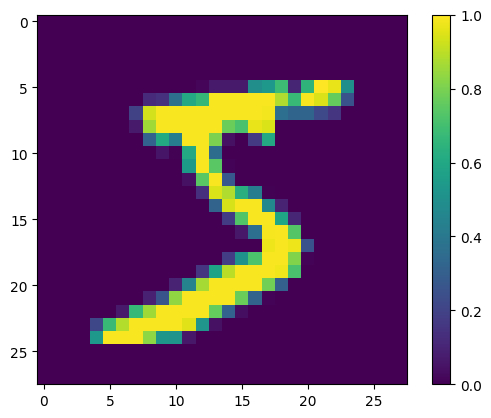

In [19]:
# 6. Iniciamos el pre-procesamiento de datos.

  # Nos aseguramos de que el rango de los valores de los pixeles sea correcto (0-255).

plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()


In [20]:
  # Escalamos los valores de pixeles para que se ajuste la escala de 0 a 1.
train_images = train_images / 255.0
test_images = test_images / 255.0

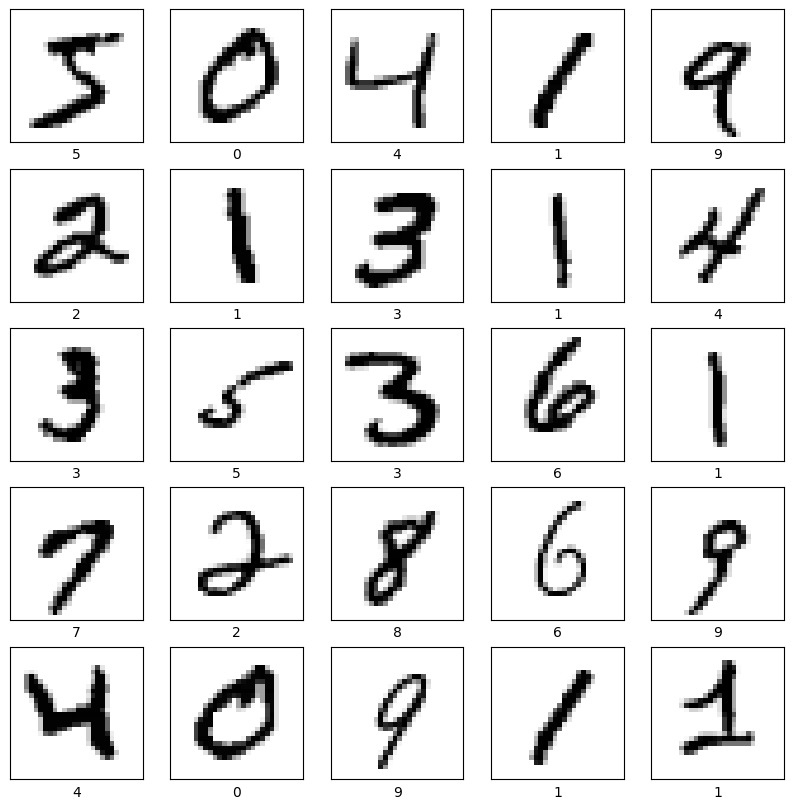

In [21]:
  # Mostramos las primeras 25 imágenes del Training Setg para verificar el formato del set de datos.
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [24]:
# 7. Comenzamos con la configuración de capas del modelo.
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), #Cambiamos el arreglo a unidimensional.
    keras.layers.Dense(128, activation='relu'), #Capa conteniendo 128 neuronas.
    keras.layers.Dense(10, activation='softmax') #Capa softmax (función de activación de capa de salida) de 10 neuronas (al ser diez clases)
])


In [26]:
# 8. Ya teniendo sus capas, compilamos el modelo, agregando configuraciones necesarias.
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])  #Métrica a utilizar (exactitud) para evaluar el proceso de entrenamiento.

In [27]:
# Comenzamos el entrenamiento con el método fit, que ajusta al set de datos de training.
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 12s 6ms/step - loss: 1.1481 - accuracy: 0.7161
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4757 - accuracy: 0.8769
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3748 - accuracy: 0.8968
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3355 - accuracy: 0.9048
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3135 - accuracy: 0.9109
Epoch 6/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2979 - accuracy: 0.9144
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2859 - accuracy: 0.9178
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2756 - accuracy: 0.9206
Epoch 9/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2663 - accuracy: 0.9236
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.25

In [31]:
  # Obtuvimos exactitud del 92.58%, luego de diez épocas de ajuste.

# 11. Procedemos a evaluar la exactitud del modelo, comparando rendimiento con el set de datos.
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.2502 - accuracy: 0.9270 - 491ms/epoch - 2ms/step

Test accuracy: 0.9269999861717224


In [113]:
  # Comprobamos que la exactitud del set de datos (92.69%) es ligeramente mayor que la del set de entrenamiento.
  # Tal información nos indica que no hay sobreajuste/ overfitting.

# 12. Continuamos con establecer el uso del modelo para predecir imágenes.
predictions = model.predict(test_images)
predictions[0] #Solicitamos la primera predicción.




313/313 [==============================] - 1s 2ms/step


array([8.4617532e-05, 4.2916867e-08, 1.8820383e-04, 2.8938283e-03,
       4.3453932e-07, 7.3351708e-05, 2.3490625e-09, 9.9492961e-01,
       1.8771079e-05, 1.8111083e-03], dtype=float32)

In [114]:
  #Obtenemos el valor máximo de confianza de la predicción.
np.argmax(predictions[0])

7

In [115]:
   # Esta predicción nos indica que el modelo detecta mayor probabilidad de que sea la clase 7 = número 7.
   # Comprobamos que la predicción es correcta.
test_labels[0]

7

In [116]:
# 13. Procedemos a graficar para ver el set de predicción.

def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'green' # El color de la predicción es verde si es correcta.
  else:
    color = 'red' # Color rojo si es lo contrario.

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)



In [117]:
  # Definimos a la función que nos va a graficar la confianza que se tiene en el porcentaje de predicción.
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red') # El color de la predicción será azul.
    thisplot[true_label].set_color('green') # El color de la verdadera etiqueta será verde.

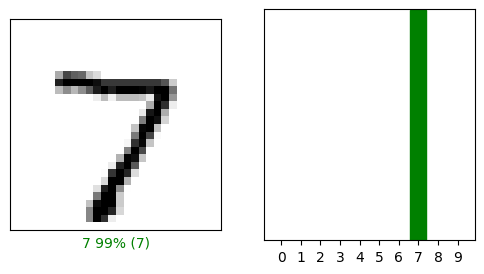

In [118]:
  # Solicitamos al set de predicción la información de la primera imagen.
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()


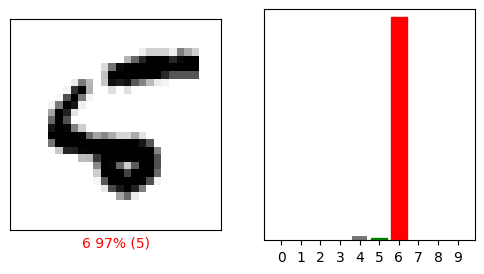

In [119]:
  # Obtenemos una seguridad del 99%, misma que se observa graficada con una barra verde.
  # Vemos que, efectivamente, se trata del número 7.Hacemos la misma prueba con otra predicción.
i = 8
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()


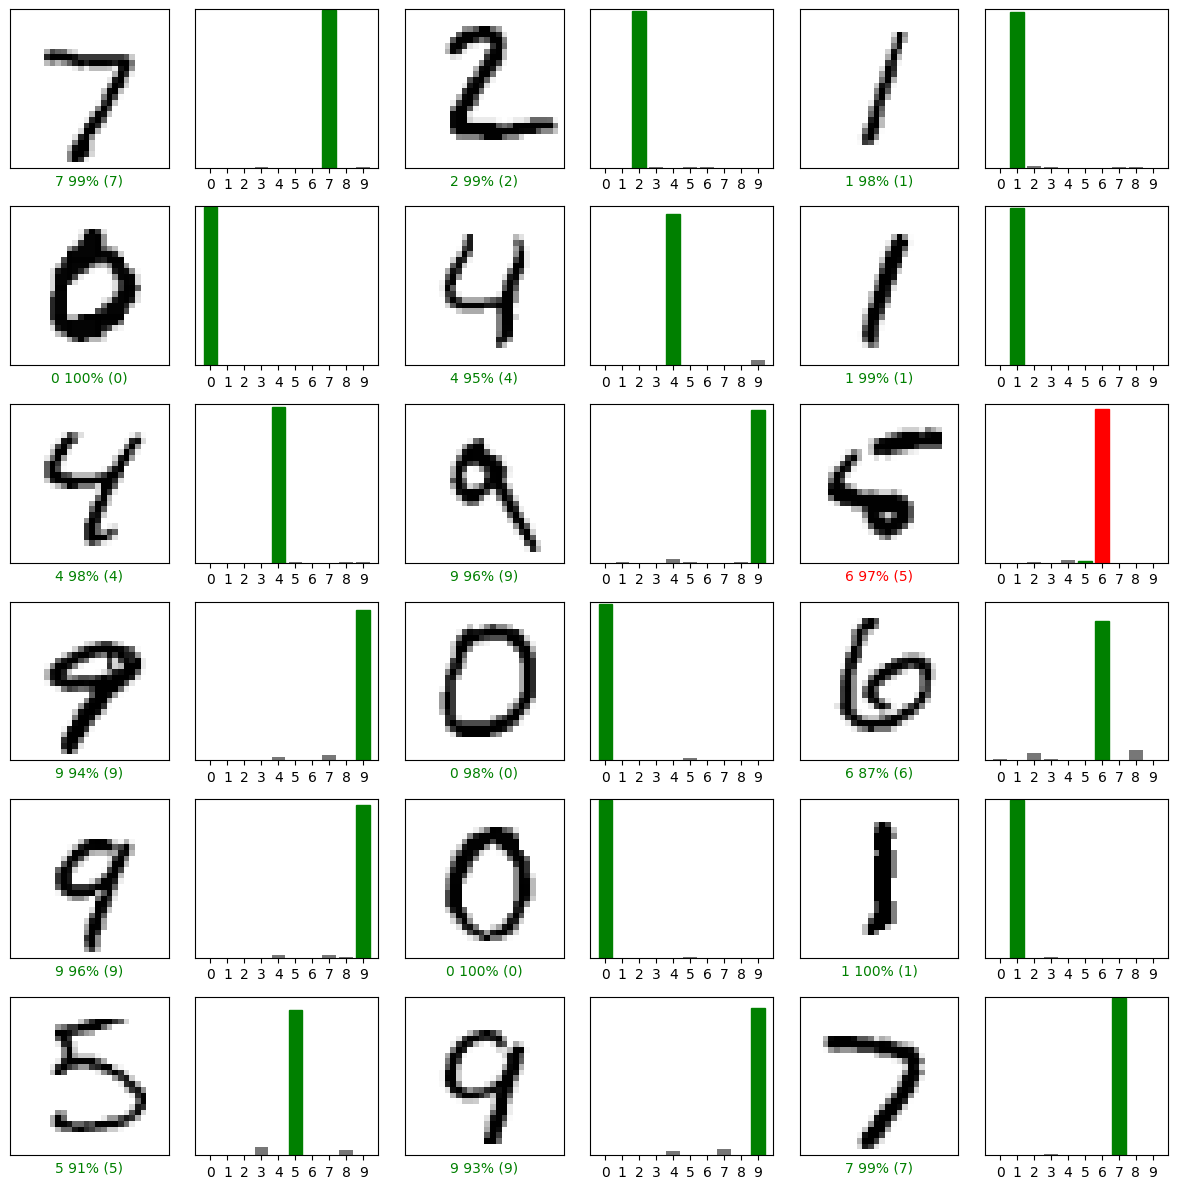

In [120]:
  # Con esto, podemos apreciar que, si bien está un 97% seguro de que se trata de un 6, en realidad la imagen muestra un 5.

  # Graficamos distintas imágenes con sus predicciones, para motivos de comprobación.
num_rows = 6
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
 plt.subplot(num_rows, 2*num_cols, 2*i+1)
 plot_image(i, predictions[i], test_labels, test_images)
 plt.subplot(num_rows, 2*num_cols, 2*i+2)
 plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()


In [121]:
  # Para más motivos de comprobación, nuevamente solicitamos una predicción para una imagen específica.
  img = test_images[2]
  print(img.shape)

  img = (np.expand_dims(img,0)) #La agregamos a un batch.
  print(img.shape)


(28, 28)
(1, 28, 28)


1/1 [==============================] - 0s 21ms/step
[[4.2842685e-06 9.8196810e-01 8.2547227e-03 2.1255948e-03 1.4963203e-04
  7.9450372e-04 9.7250164e-04 3.0090103e-03 2.4170722e-03 3.0460142e-04]]


1

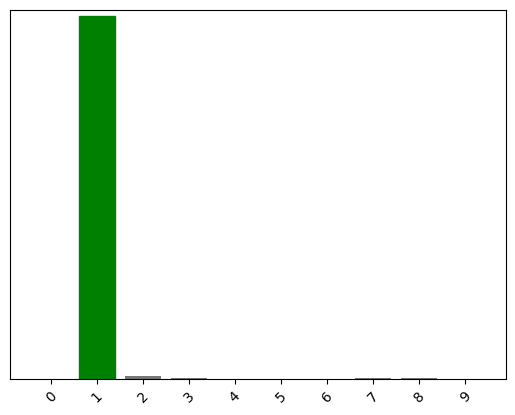

In [122]:
    # Predecimos la etiqueta correcta de la imagen
predictions_single = model.predict(img)
print(predictions_single)

    # Graficamos.
plot_value_array(2, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

    # Solicitamos predicción
np.argmax(predictions_single[0])



(28, 28)
(1, 28, 28)
1/1 [==============================] - 0s 30ms/step
[[1.9251239e-04 1.0882272e-06 3.1824068e-03 5.7403169e-05 9.5279747e-01
  7.8575360e-04 1.5014380e-03 3.6735504e-03 1.8121096e-03 3.5996281e-02]]


4

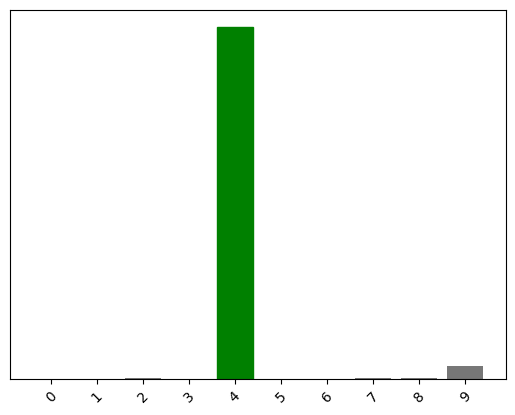

In [133]:
# Hacemos otras 4 predicciones, pues es lo que se nos solicita.

        #  1
img = test_images[4]
print(img.shape)

img = (np.expand_dims(img,0)) #La agregamos a un batch.
print(img.shape)

    # Predecimos la etiqueta correcta de la imagen
predictions_single = model.predict(img)
print(predictions_single)

    # Graficamos.
plot_value_array(4, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

    # Solicitamos predicción
np.argmax(predictions_single[0])

(28, 28)
(1, 28, 28)
1/1 [==============================] - 0s 32ms/step
[[1.19833783e-06 9.65684308e-07 1.22254175e-06 1.16164505e-04
  9.83520210e-01 4.89653740e-03 2.49150435e-05 3.17092636e-04
  3.12706060e-03 7.99470395e-03]]


4

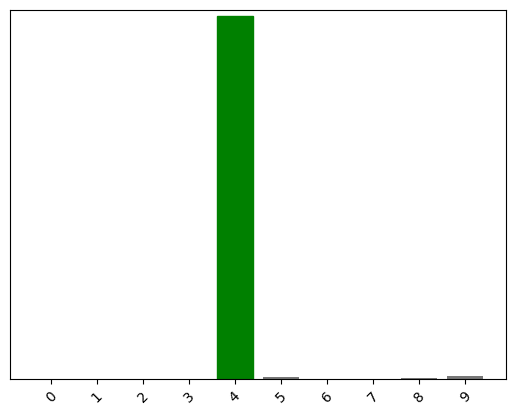

In [124]:
        #  2

img = test_images[6]
print(img.shape)

img = (np.expand_dims(img,0)) #La agregamos a un batch.
print(img.shape)

    # Predecimos la etiqueta correcta de la imagen
predictions_single = model.predict(img)
print(predictions_single)

    # Graficamos.
plot_value_array(6, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

    # Solicitamos predicción
np.argmax(predictions_single[0])

(28, 28)
(1, 28, 28)
1/1 [==============================] - 0s 20ms/step
[[8.08410812e-04 6.37311871e-07 1.78309006e-03 1.11843555e-07
  1.63806509e-02 1.14582386e-02 9.68216777e-01 2.21657089e-07
  1.30202400e-03 4.97525689e-05]]


6

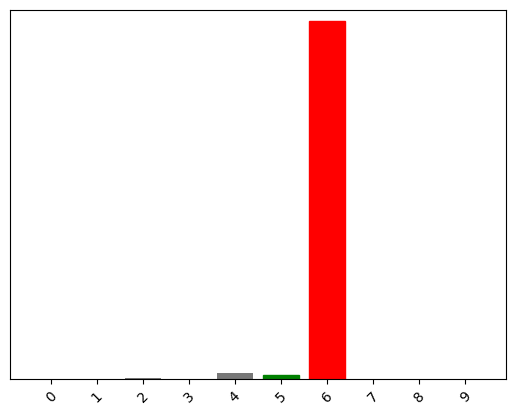

In [125]:
        #  3

img = test_images[8]
print(img.shape)

img = (np.expand_dims(img,0)) #La agregamos a un batch.
print(img.shape)

    # Predecimos la etiqueta correcta de la imagen
predictions_single = model.predict(img)
print(predictions_single)

    # Graficamos.
plot_value_array(8, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

    # Solicitamos predicción
np.argmax(predictions_single[0])

(28, 28)
(1, 28, 28)
1/1 [==============================] - 0s 22ms/step
[[9.8300284e-01 3.4212382e-09 1.5537707e-03 1.2420064e-04 1.0466129e-07
  1.2971765e-02 4.8070015e-05 2.5638926e-07 2.2984901e-03 4.5180465e-07]]


0

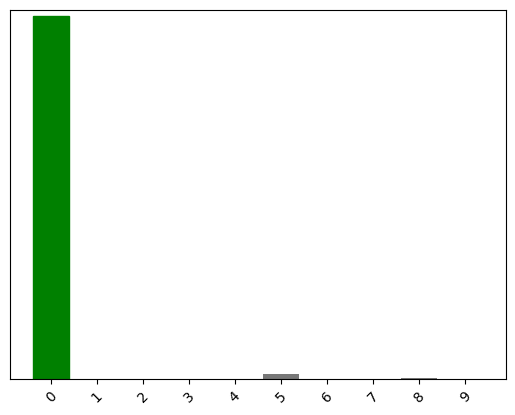

In [126]:
        #  4

img = test_images[10]
print(img.shape)

img = (np.expand_dims(img,0)) #La agregamos a un batch.
print(img.shape)

    # Predecimos la etiqueta correcta de la imagen
predictions_single = model.predict(img)
print(predictions_single)

    # Graficamos.
plot_value_array(10, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

    # Solicitamos predicción
np.argmax(predictions_single[0])